# **Business Understanding**
Company X merupakan sebuah perusahaan yang bergerak di bidang consultant digital marketing.
## **`Problem`**
Ingin mengetahui seberapa besar ketercapaian iklan yang dipasarkan dan  ingin mengoptimalkan metode cara beriklan di platform digital agar mendapat kan user yang potential untuk click sebuah product. Agar cost yang akan dikeluarkan tidak terlalu besar.
## **`Goals`**
Membantu Company X dalam meningkatkan ketercapaian iklan yang dipasarkan melalui platform digital dengan mendapatkan user yang berpontial untuk click sebuah product serta mengurangi cost yang besar
## **`Objective`**
Membangun model machine learning yang dapat mendeteksi potential user untuk convert atau tertarik pada sebuah iklan. Sehingga kita bisa mengoptimalkan cost dalam beriklan di platform digital.
## **`Business Metrics`**
- Potential user convert to iklan
- Mengurangi cost yang besar

# **Explore data**
- **Daily Time Spent on Site:** Lamanya tinggal disuatu situs (harian) dalam satuan menit
- **Age:** Umur user dalam satuan tahun
- **Area Income:** Pendapatan user dalam satuan rupiah
- **Daily Internet Usage:** Penggunaan internet harian dalam satuan menit
- **Male:** Gender user
- **Timestamp:** Kapan user visit sebuah situs
- **Clicked on Ad:** Click atau tidak iklan yang ditampilkan
- **city:** Kota asal user
- **province:** Provinsi asal user
- **category:** Kategori product yang dikunjungi

In [34]:
!pip install ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=018499c8a65f79835ef665d127fa9c2cc0dd6d3f669e464b8abe32a9846a3799
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\d8\2d\fc\c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import time

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/FitAndraini/portfolio_data_science_and_data_analyst/master/Dataset/clicked_ads.csv")
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# **Exploratory Data Analysis**

## **Descriptive Statistics**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
# Cek Data NULL
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [6]:
# Melihat jumlah data
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Unnamed: 0:
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: Unnamed: 0, Length: 1000, dtype: int64

Value count kolom Daily Time Spent on Site:
84.53    3
75.55    3
78.76    3
77.05    3
62.26    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 890, dtype: int64

Value count kolom Age:
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

Value count kolom Area Income:
432837300.0    1
265358030.0    1
422206330.0    1
471261000.0    1
350387310.0    1
              ..
518172270.0    1
423854620.0    1

Simpulan Data
- Null value **Daily Time Spent on Site**, **Area Income**, **Daily Internet Usage**, **Male**                         
- Type data sudah sesuai
- Tidak ada nilai aneh
- Kolo **Timestamp** perlu diextract menjadi **Day, Mont, Year**
- **Label :** Clicked on Ad

## **Statistical Summary**

In [7]:
nums = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]
cats = ["Male", "Timestamp", "Clicked on Ad", "city", "province", "category"]

In [8]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [9]:
df.select_dtypes(exclude='object').nunique()

Unnamed: 0                  1000
Daily Time Spent on Site     890
Age                           43
Area Income                  987
Daily Internet Usage         955
dtype: int64

### Pendekatan Numeric
- Perbandingan nilai **min dan max** kolom **Area Income** dan **Daily Internet Usage** cukup jauh.
- Selisih nilai **mean dan median** setiap kolom tidak terlalu jauh sehingga sudah signifikan, hanya saja kolom **Age** memiliki nilai mean > median sehingga terindikasi **positively skewed**.
- Tidak terdapat kolom yang memiliki 1 unique value, jika terdapat maka akan didrop

In [10]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


### Pendekatan Categorical
- Pada data categoric tidak terdapat kolom yang memiliki nilai unique 1
- Kolom **Timestamp** memiliki unique value yang tinggi (high cardinality), namun saat ini tidak dilakukan drop feature karena **Timestamp** mendefenisikan kapan user visit sebuah iklan sehingga feature ini dianggap penting

## **Univariate Analysis**

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada kolom Numeric dengan Univariate Analysis untuk melihat distribusinya.

### Boxplot

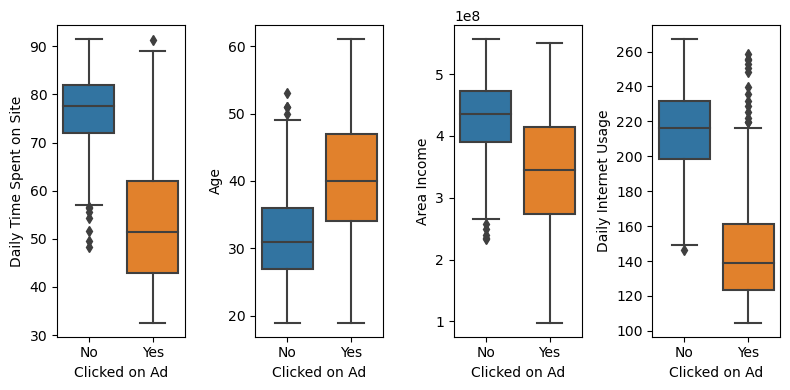

In [11]:
plt.figure(figsize=(8,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], orient='v', x = df['Clicked on Ad'])
    plt.tight_layout()

### Violin Plots

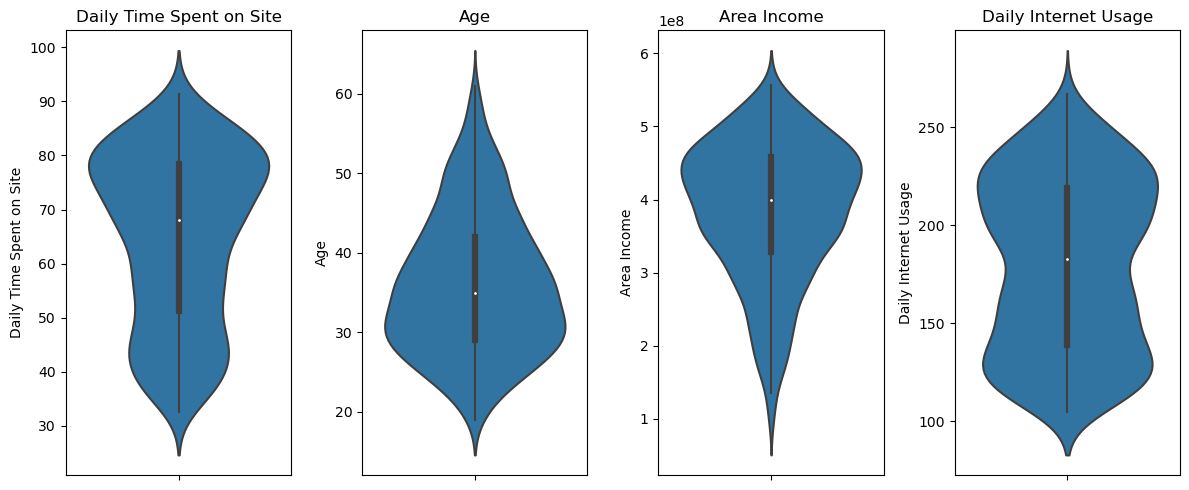

In [12]:
fig, axs = plt.subplots(1, len(nums), figsize=(12, 5), squeeze=False)
for i, nums in enumerate(nums):
    sns.violinplot(y=df[nums], ax=axs[0][i], hue=df['Clicked on Ad'])
    axs[0][i].set_title(nums)

plt.tight_layout()
plt.show()

Berdasarkan Visualisasi diatas:
- **`Daily Time Spent onSite`**
    - Pelanggan yang malakukan klik iklan maka mereka menghabiskan waktu berlama-lama tinggal disuatu situs (harian) sekitar 30-90 menit. Namun distribusi terbanyak nya sekitar 42-62 menit, artinya pelanggan yang melakukan klik iklan paling banyak menghabiskan waktu di situs sekitar 42-62 menit.
    - Sedangkan pelanggan yang tidak melakukan klik iklan mereka berlama-lama berada di situs (harian) sekitar 59-92 menit, dan distribusi terbanyak ada disekitar 72-82 menit.
    - **Rekomendasi Bisnis** Pelajari apa yang dilakukan atau dicari pelanggan tersebut di sebuah situs, sehingga dengan mengetahui aktifitasnya kita bisa memberikan rekomendasi iklan yang sesuai dengan yang dicari pelanggan, sehingga kemungkinan untuk klik sebuah iklan akan lebih banyak.
- **`Age`**
    - Pelanggan yang melakukan klik iklan rata-rata berumur 19-62 tahun, dan distribusi terbanyak umur pelanggan yang melakukan klik iklan antara 35-48 tahun. Artinya mungkin iklan yang dibutuhkan pelanggan sudah memberikan rekomendasi produk yang ia butuhkan.
    - Sedangkan pelanggan yang tidak melakukan klik iklan rata-rata berumur 19-50 tahun, dan distribusi terbnyak ada sekitar 28-37 tahun. Artinya pelanggan yang tidak melakukan klik iklan sedang tidak tertarik dengan iklan yang ditampilkan atau sedang tidak mencari produk.
- **`Area Income`**
    - Rata-rata pendapatan user yang melakukan klik iklan sekitar 1-7 Rupiah, dan distribusi dengan pendapatan terbanyak ada sekitar 2.8-4.2 rupiah.
    - Rata-rata pendapatan user yang tidak melakukan klik iklan sekitar 2.8-7 Rupiah, dan distribusi dengan pendapatan terbanyaknya sekitar 3.9-4.8 Rupiah.
- **`Daily Internet Usage`**
    - Penggunaan internet harian user yang melakukan klik iklan sekitar 100-220 menit, dan distribui terbnayak pengguna internet harian user sekitar 120-160 menit.
    - Sedangkan user yang tidak melakukan klik iklan pengguna inter hariannya sekitar 150-270 menit, dan distrusi pengguna internet harian terbanyak sekitar 200-230 menit.


### Histplot

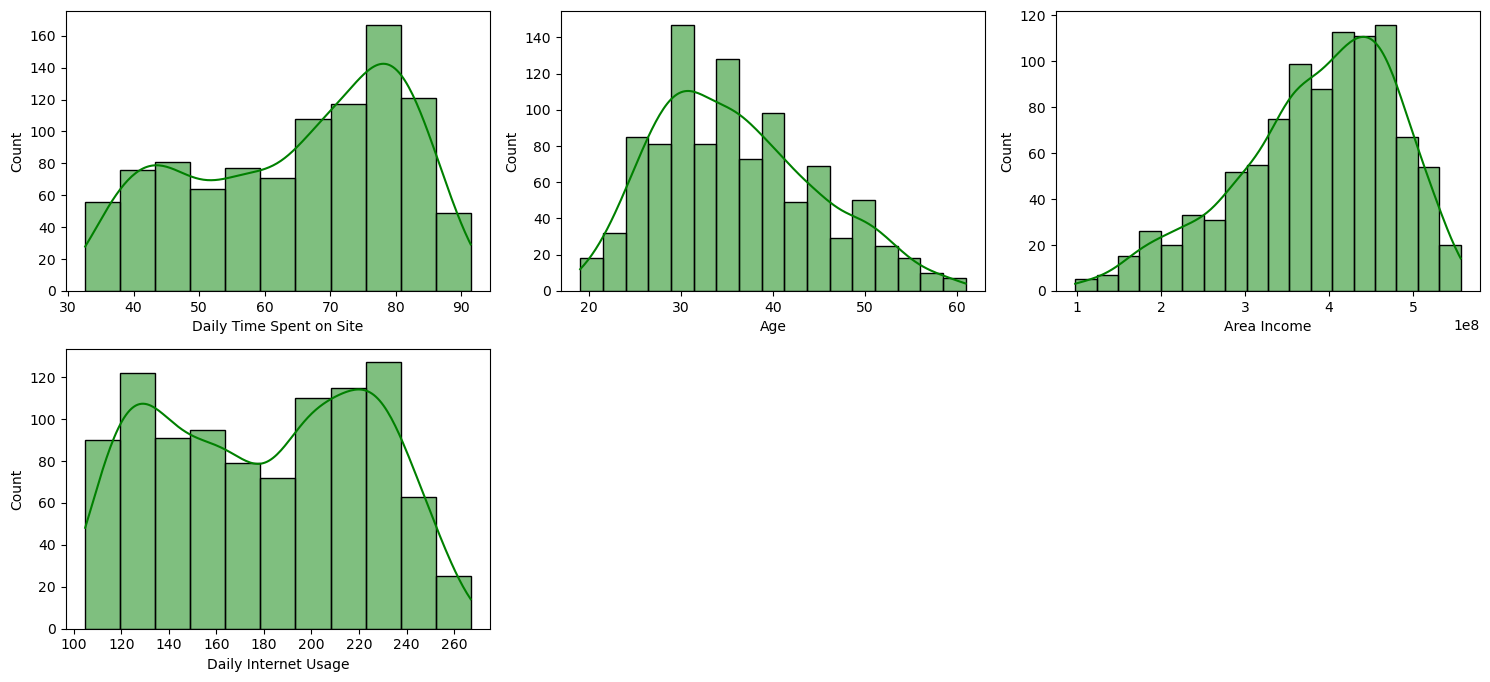

In [13]:
nums = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

plt.figure(figsize=(15, 20))
for i in range(0, len(nums)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

Berdasarkan Visualisasi Hist Plots diatas:
- **`Daily Time Spent on Site`** berbentuk Bimodal
    - User terbanyak yang berlama-lama tinggal disuatu situs paling banyak menghabiskan waktu sekitar 80 menit, namun paling sedikit 90 menit, artinya ada beberapa user yang menghabiskan waktu berlama-lama  di situs sekitar 90 menit.
    - User yang berlama-lama menghabiskan waktu di situs berarti user tersebut memang sering membuka sebuah situs tersebut.
- **`Age`** berbentuk Positively Skewed
    - User yang membuka situs paling banyak berumur 30 tahun dan paling sedikit 60 tahun.
    - Dari segi umur terlihat bahwa pelanggan yang memiliki umur lebih tinggi lebih sering membuka sebuah situs daripada yang berumur muda, contohnya umur 25-50 tahun lebih sering membuka membuka situs daripada yang berumur 20-23, artinya sebuah situs tersebut lebih banyak diminati oleh kaula tua daripada kaula muda.
- **`Area Income`** berbentuk Positively Skewed
    -  Pendapatan user tertinggi adalah 4.8 Rupiah, sedangkan yang paling rendah adalah 1 Rupiah.
- **`Daily Internet Usage`** berbentuk Bimodal
    - Penggunaan internet harian user terbanyak 230 menit dan terendah 260 menit. Artinya user lebih banyak menggunakan internet dalam waktu 230 menit dan ada beberapa user yang melebihi pengguna internet lain hingga mencapai 260 menit penggunaan internet

### Countplot (categorical)

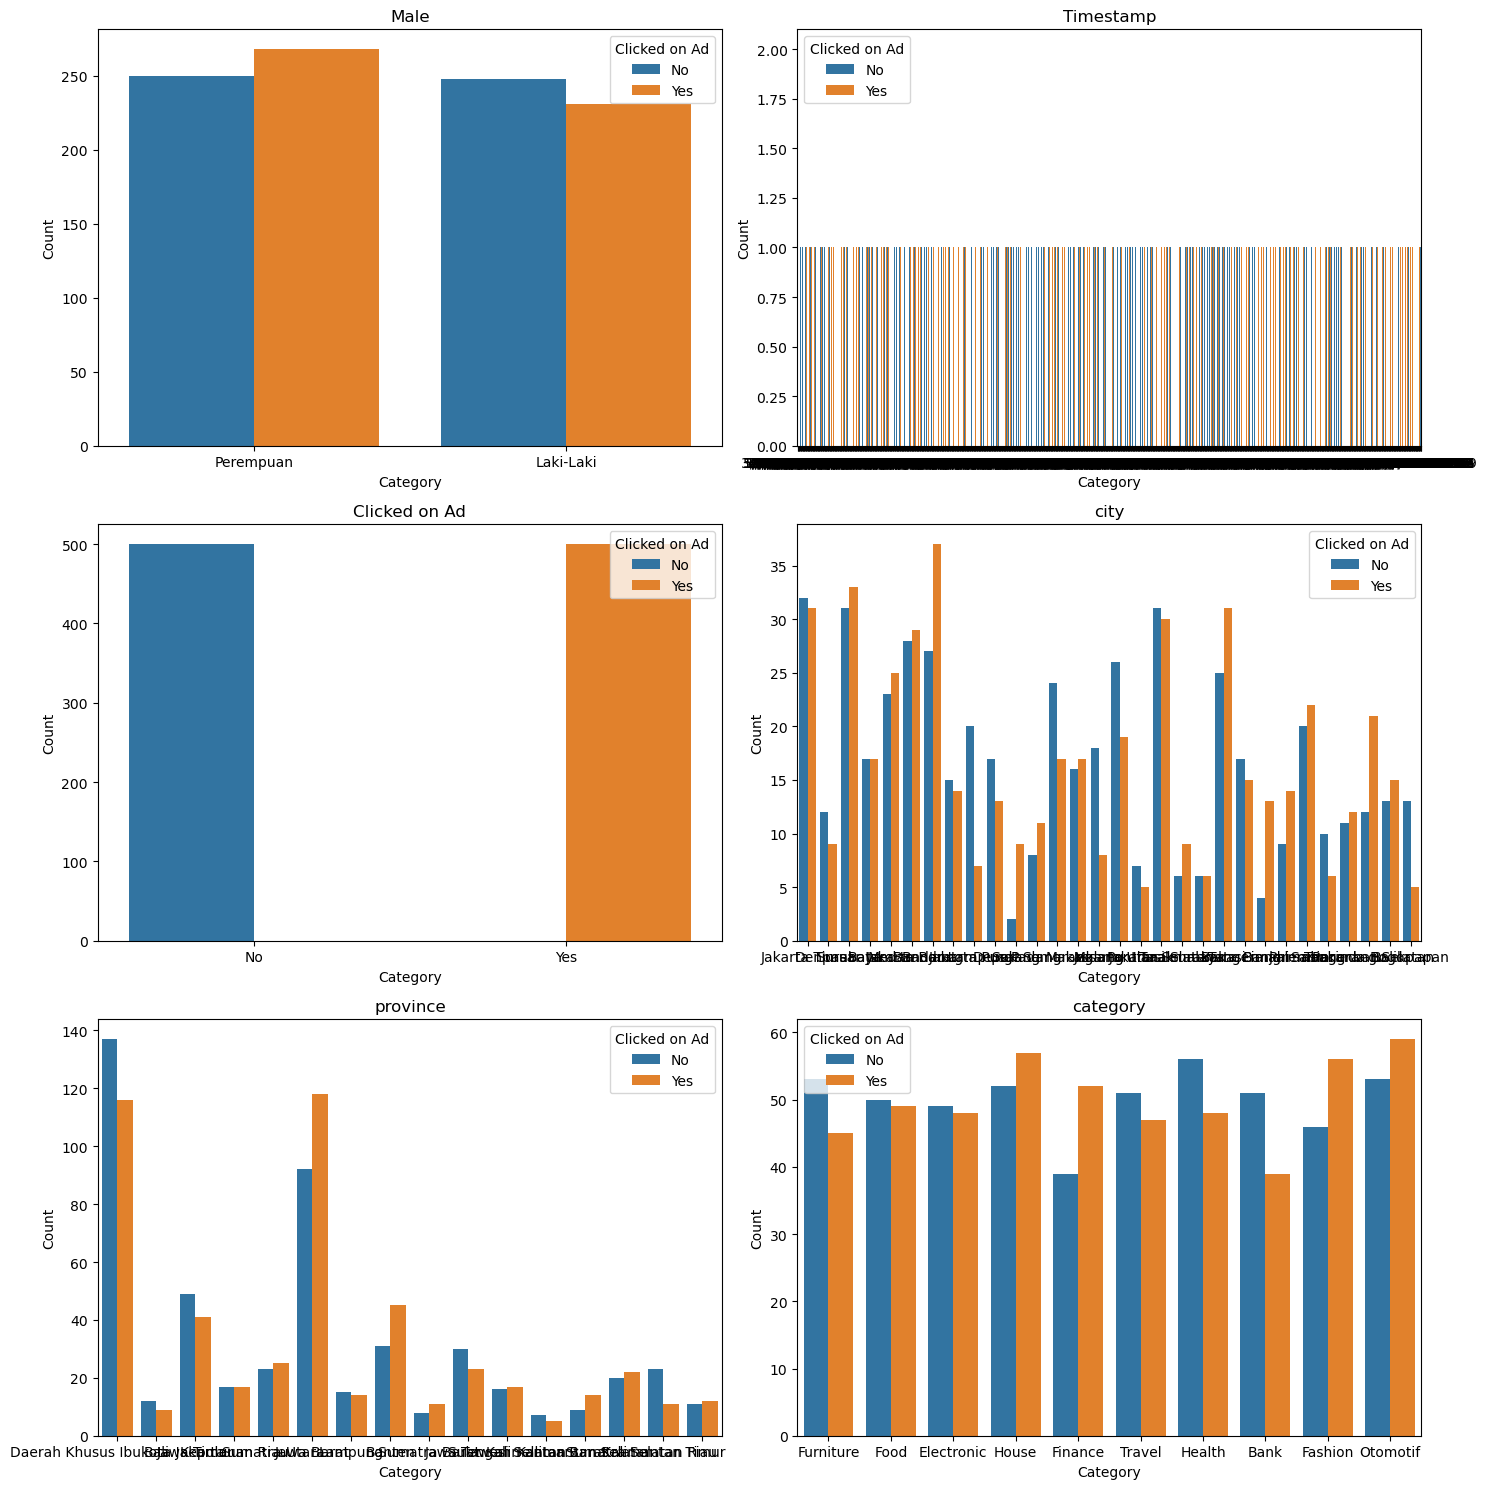

In [20]:
feat_cat = cats
n = len(feat_cat)

rows = (n + 1) // 2
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i in range(n):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[feat_cat[i]], hue = df['Clicked on Ad'], ax=ax[row, col])
    ax[row, col].set_title(feat_cat[i])
    ax[row, col].set_xlabel("Category")
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

Berdasarkan Visualisasi Countplot diatas:
- Jenih kelamin Perempuan lebih banyak klik iklan daripada Laki-laki.
- User yang melakukan klik iklan dan tidak klik iklan sama banyak.
- Berdasarkan kategori product yang  yang dikunjungi oleh user, product yang paling banyak di klik iklannya adalah jenis Otomotif dan paling sedikit adalah jenis penawaran Bank, Artinya jenis Otomotif lebih banyak disenangi oleh user. Dan ada juga jenis **House** dan **Fashion** yang banyak diklik iklannya, Artinya banyak user yang menyenangi jenis product **Fashion** dan **House**.

## **Multivariate Analysis**

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<AxesSubplot:>

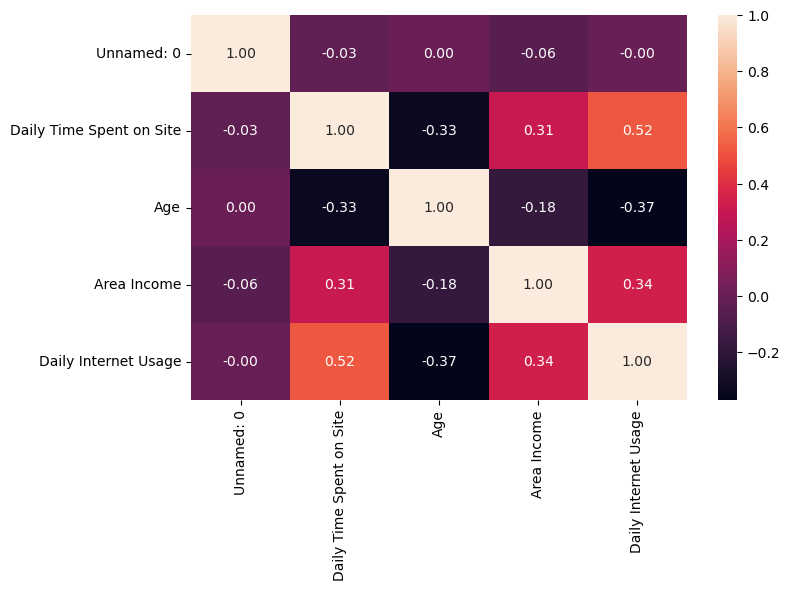

In [31]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dari korelasi di atas tidak ditemukan adanya multicorrelation (korelasi antar variable) sehingga dapat menggunakan semua feature untuk dilakukan modeling. Namun dengan menggunakan korelasi pearson tidak dapat mengetahui hubungan antara feature dengan targetnya. Maka di bawah ini kita akan menggunakan **PPS (Predictive Power Score)** dalam menghitung hubungan antar feature dengan targetnya.

### Correlation using PPScore

In [36]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

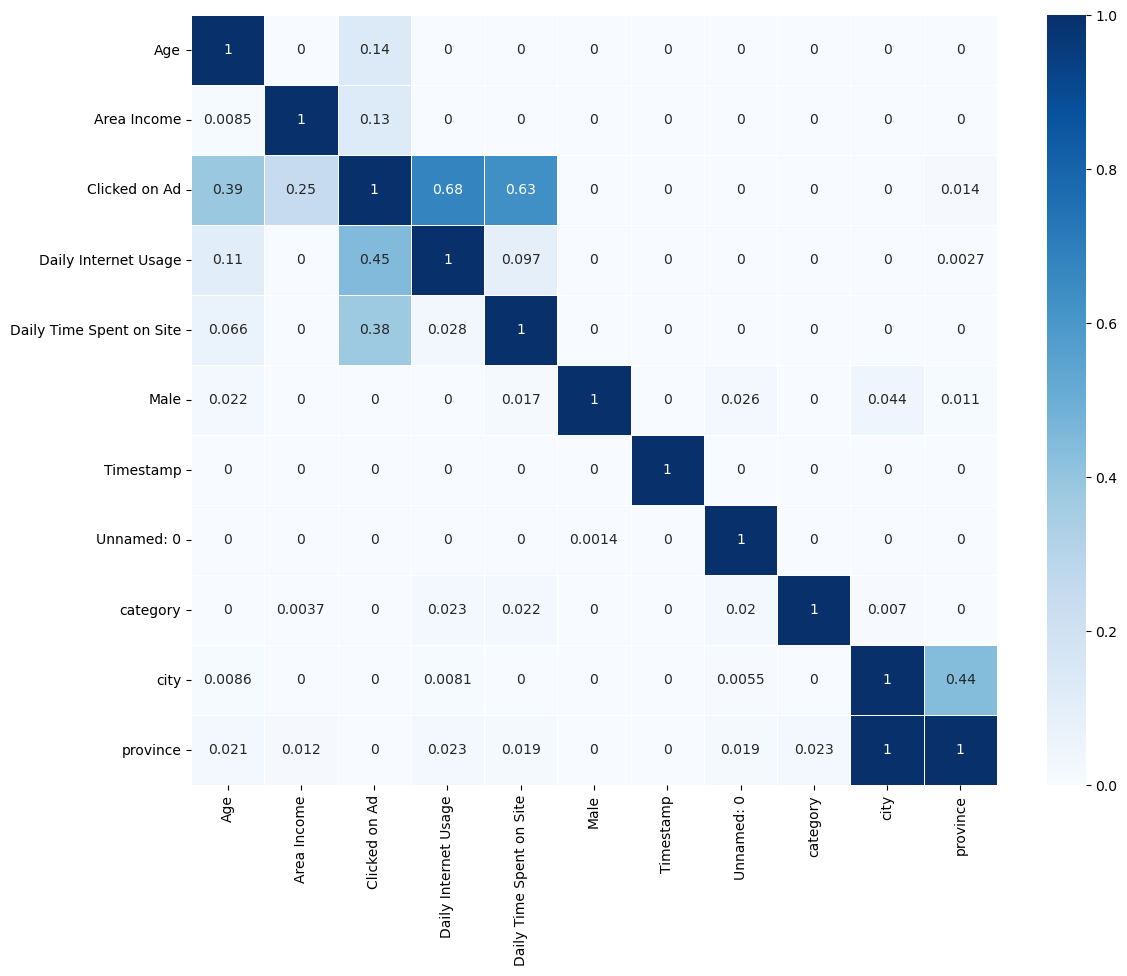

In [37]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Berdasarkan correlation plot menggunakan PPS di atas, fokus utama pada feature `Clicked on Ad` saja. Karena variable tersebut adalah target yang akan digunakan.

Feature yang cukup berhubungan dengan target:
- Daily Internet Usage
- Daily Time Spent on Site
- Age
- Area Income

Correlation plot ini bisa menjadi panduan dalam melakukan modeling

## **Data Preprocessing**

### Handle Missing Value

In [40]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [41]:
# Isi Data Missing Value
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['Male'].fillna(df['Male'].mode()[0],inplace=True)

### Handling Duplicated Data


In [42]:
df.duplicated().sum()

0

In [43]:
df.duplicated(subset=["Unnamed: 0"]).sum()

0

### Handling Invalid Values

In [44]:
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Feature Extraction (Feature Engineering)

In [45]:
df['user_visit_day'] = pd.to_datetime(df['Timestamp']).dt.day
df['user_visit_month'] = pd.to_datetime(df['Timestamp']).dt.month
df['user_visite_year'] = pd.to_datetime(df['Timestamp']).dt.year

In [46]:
# Rubah data
df['Clicked on Ad'] = df['Clicked on Ad'].replace('No', '0')
df['Clicked on Ad'] = df['Clicked on Ad'].replace('Yes', '1')

In [47]:
# Rubah type data
df['Clicked on Ad'] = df['Clicked on Ad'].astype(int)

### Feature Selection (Feature Engineering)

In [48]:
df_select = df.drop(columns=["Timestamp"]).copy()
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   object 
 6   Clicked on Ad             1000 non-null   int32  
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  user_visit_day            1000 non-null   int64  
 11  user_visit_month          1000 non-null   int64  
 12  user_visite_year          1000 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 97.8+

### Handling Outliers (Numeric)

**Cek Outlier sebelum dilakukan Handle Outlier**

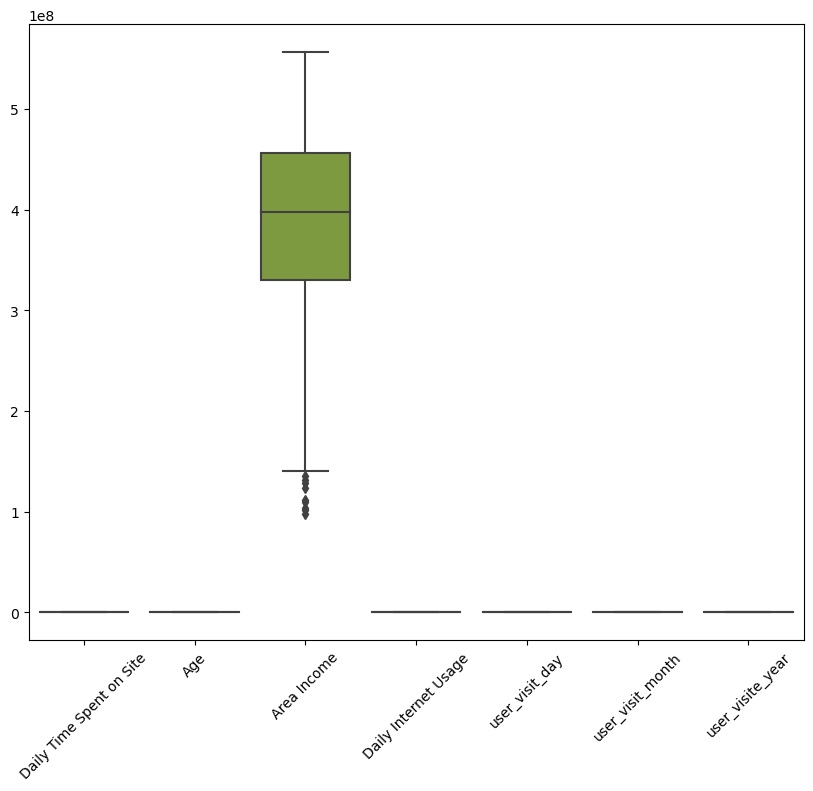

In [49]:
# Use Boxplot
df_numerical = df_select.select_dtypes(include = ["int64","float64"])

# Figure Size Setting
plt.figure(figsize=(10,8))

# Boxplot using Seaborn
sns.boxplot(data=df_numerical.drop(["Unnamed: 0"],axis=1),
            palette="husl")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [50]:
df_select.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,user_visit_day,user_visit_month,user_visite_year
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620,0.50000,15.484000,3.817000,2016.0
std,288.819436,15.741268,8.785562,9.346585e+07,43.627946,0.50025,8.734073,1.926973,0.0
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000,0.00000,1.000000,1.000000,2016.0
25%,249.750000,51.545000,29.000000,3.298201e+08,139.017500,0.00000,8.000000,2.000000,2016.0
50%,499.500000,67.780000,35.000000,3.975088e+08,181.065000,0.50000,15.000000,4.000000,2016.0
75%,749.250000,78.352500,42.000000,4.566932e+08,218.287500,1.00000,23.000000,5.000000,2016.0
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000,1.00000,31.000000,7.000000,2016.0


Standar Deviasi **Area Income** juga tinggi sehingga perlu dilakukan remove outlier, jika standar deviasi rendah maka dapat dimaklumi

In [51]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_select)}')

filtered_entries = np.array([True] * len(df_select))
for col in ['Area Income']:
    Q1 = df_select[col].quantile(0.25)
    Q3 = df_select[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_select[col] >= low_limit) & (df_select[col] <= high_limit)) & filtered_entries

df_clean = df_select[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 1000
Jumlah baris setelah memfilter outlier: 991


**Setelah dilakukan Handle Outlier**

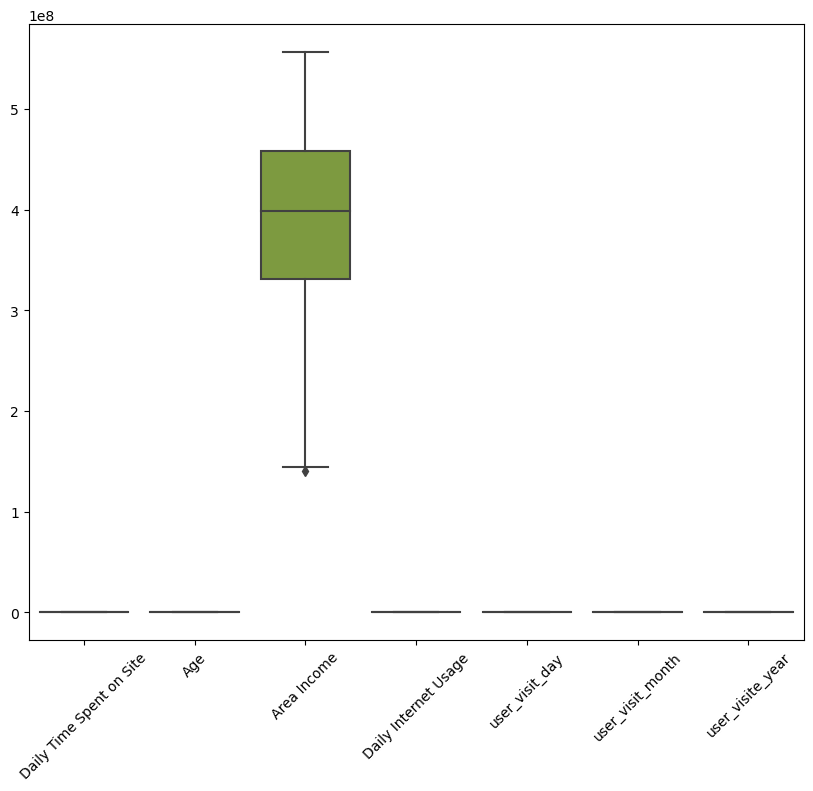

In [52]:
# Use Boxplot
df_numerical2 = df_clean.select_dtypes(include = ["int64","float64"])

# Figure Size Setting
plt.figure(figsize=(10,8))

# Boxplot using Seaborn
sns.boxplot(data=df_numerical2.drop(["Unnamed: 0"],axis=1),
            palette="husl")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [53]:
df_clean = df_clean.drop(columns=["Unnamed: 0"]).copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Male                      991 non-null    object 
 5   Clicked on Ad             991 non-null    int32  
 6   city                      991 non-null    object 
 7   province                  991 non-null    object 
 8   category                  991 non-null    object 
 9   user_visit_day            991 non-null    int64  
 10  user_visit_month          991 non-null    int64  
 11  user_visite_year          991 non-null    int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 96.8+ KB


### Feature Transformation (Numeric)

Skewed distribution = MinMaxScaler <br>
Normal distribution = StandardScaler


**Note:**
Tidak boleh menggunakan keduanya secara bersamaan.
Karena data berdistribusi skewed, maka sebaiknya menggunakan normalisasi

**Cek Distribusi sebelum dilakukan Transformation**

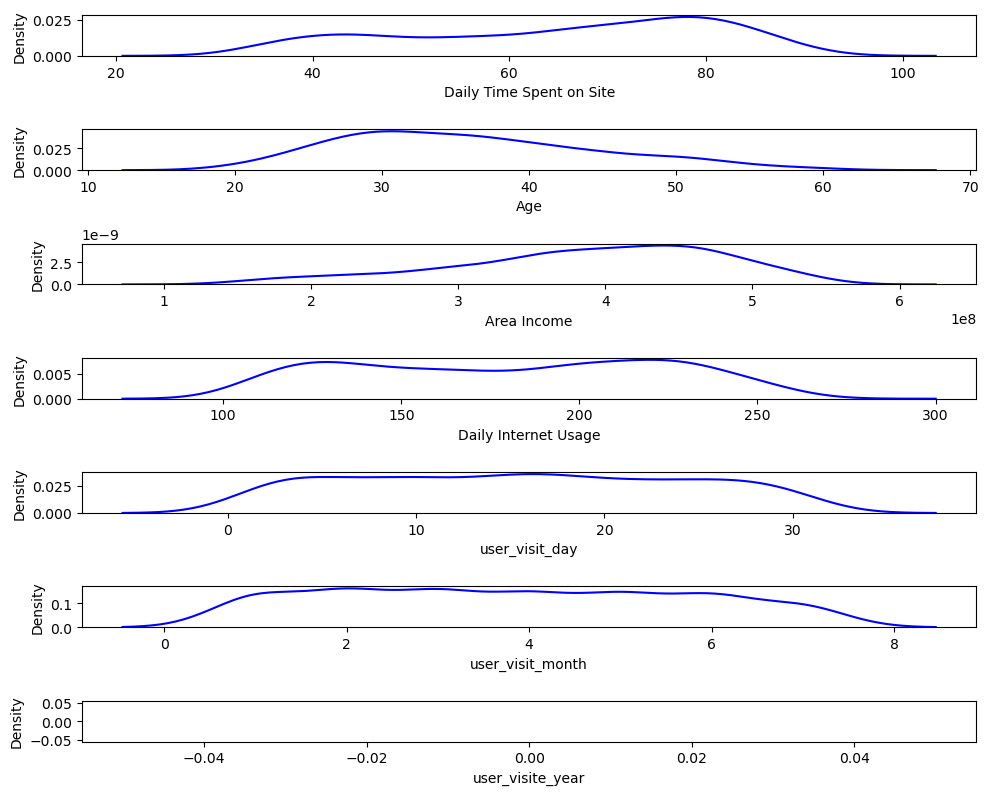

In [55]:
num = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
       'user_visit_day', 'user_visit_month', 'user_visite_year']

plt.figure(figsize=(10, 8))
for i in range(0, len(num)):
    plt.subplot(7,1, i+1)
    sns.kdeplot(x = df_clean[num[i]], color='blue')
    plt.xlabel(num[i])


plt.tight_layout()

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_clean['Daily_Time_Spent_on_Site_norm'] = MinMaxScaler().fit_transform(df_clean['Daily Time Spent on Site'].values.reshape(len(df_clean), 1))
df_clean['Age_norm'] = MinMaxScaler().fit_transform(df_clean['Age'].values.reshape(len(df_clean), 1))
df_clean['Area_Income_norm'] = MinMaxScaler().fit_transform(df_clean['Area Income'].values.reshape(len(df_clean), 1))
df_clean['Daily_Internet_Usage_norm'] = MinMaxScaler().fit_transform(df_clean['Daily Internet Usage'].values.reshape(len(df_clean), 1))
df_clean['user_visit_day_std'] = StandardScaler().fit_transform(df_clean['user_visit_day'].values.reshape(len(df_clean), 1))
df_clean['user_visit_month_std'] = StandardScaler().fit_transform(df_clean['user_visit_month'].values.reshape(len(df_clean), 1))

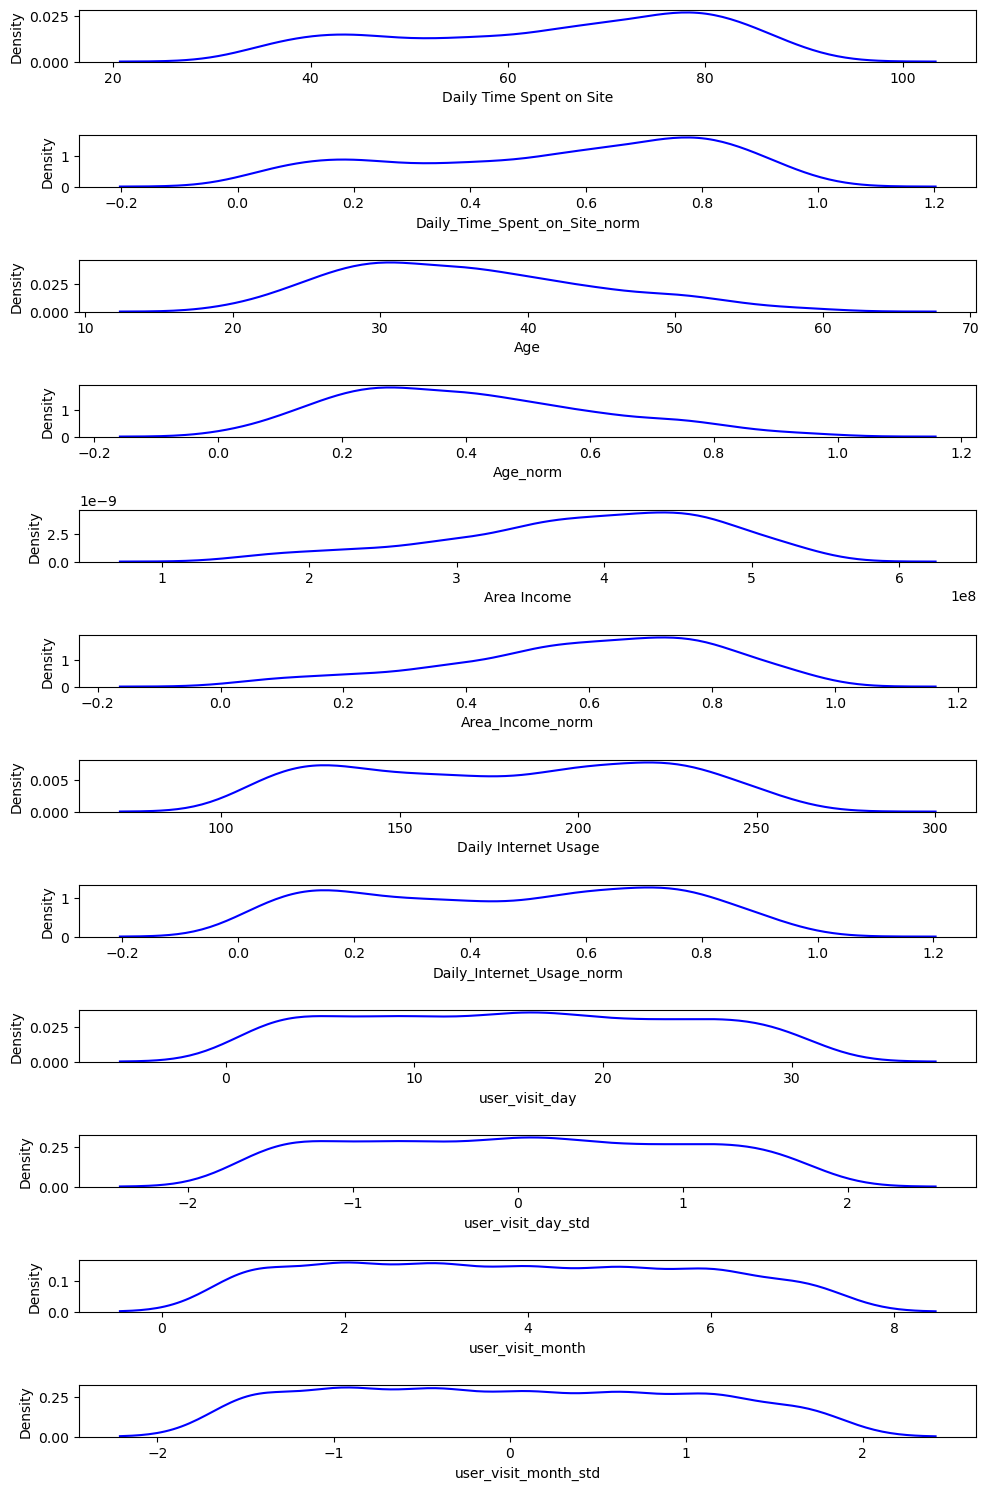

In [57]:
num = ['Daily Time Spent on Site', 'Daily_Time_Spent_on_Site_norm', 'Age','Age_norm',
       'Area Income','Area_Income_norm','Daily Internet Usage','Daily_Internet_Usage_norm',
       'user_visit_day','user_visit_day_std','user_visit_month','user_visit_month_std']

plt.figure(figsize = (10,15))
for i in range(0, len(num)):
    plt.subplot(12,1, i+1)
    sns.kdeplot(x = df_clean[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Encoding (Categorical)

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Time Spent on Site       991 non-null    float64
 1   Age                            991 non-null    int64  
 2   Area Income                    991 non-null    float64
 3   Daily Internet Usage           991 non-null    float64
 4   Male                           991 non-null    object 
 5   Clicked on Ad                  991 non-null    int32  
 6   city                           991 non-null    object 
 7   province                       991 non-null    object 
 8   category                       991 non-null    object 
 9   user_visit_day                 991 non-null    int64  
 10  user_visit_month               991 non-null    int64  
 11  user_visite_year               991 non-null    int64  
 12  Daily_Time_Spent_on_Site_norm  991 non-null    flo

In [59]:
obj = ['Male', 'city', 'province', 'category']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_clean[col].value_counts())
    print()

Value count kolom Male:
Perempuan    518
Laki-Laki    473
Name: Male, dtype: int64

Value count kolom city:
Surabaya             64
Jakarta Timur        63
Bandung              62
Jakarta Selatan      61
Jakarta Barat        56
Bekasi               55
Medan                48
Jakarta Utara        44
Palembang            42
Semarang             41
Makassar             33
Batam                33
Tangerang            32
Tangerang Selatan    31
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               10
Name: city, dtype: int64

Value count kolom province:
Daerah Khusus Ibukota Jakarta    251
Jawa Barat                       207
Jawa Timur                        90
Banten 

In [60]:
#One Hot Encoding
for cat in ['Male', 'city', 'province', 'category']:
  onehots = pd.get_dummies(df_clean[cat], prefix=cat)
  df_clean = df_clean.join(onehots)

In [61]:
df_encod_drop = df_clean.drop(columns=['Male','city', 'province','category','Daily Time Spent on Site','Age',
                                       'Area Income', 'Daily Internet Usage','user_visit_day','user_visit_month']).copy()
df_encod_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Clicked on Ad                           991 non-null    int32  
 1   user_visite_year                        991 non-null    int64  
 2   Daily_Time_Spent_on_Site_norm           991 non-null    float64
 3   Age_norm                                991 non-null    float64
 4   Area_Income_norm                        991 non-null    float64
 5   Daily_Internet_Usage_norm               991 non-null    float64
 6   user_visit_day_std                      991 non-null    float64
 7   user_visit_month_std                    991 non-null    float64
 8   Male_Laki-Laki                          991 non-null    uint8  
 9   Male_Perempuan                          991 non-null    uint8  
 10  city_Balikpapan                         991 non-null    uint8 

In [635]:
#df_encod_drop['Male_Laki-Laki'] = df_encod_drop['Male_Laki-Laki'].astype(int)
#['Male_Perempuan'] = df_encod_drop['Male_Perempuan'].astype(int)


### Handling Class Imbalance

In [62]:
df_encod_drop['Clicked on Ad'].value_counts()

0    500
1    491
Name: Clicked on Ad, dtype: int64

In [63]:
# Perbandingan Timpang antara Target = 0 dan Target = 1, butuh imbalanced learning setelah train test split
100.00 * df_encod_drop["Clicked on Ad"].value_counts() / df_encod_drop["Clicked on Ad"].shape[0]


0    50.454087
1    49.545913
Name: Clicked on Ad, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

X = df_encod_drop.drop(["Clicked on Ad"], axis=1)
y = df_encod_drop["Clicked on Ad"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

In [639]:
#!pip install catboost

In [65]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

tl = TomekLinks(sampling_strategy="auto")
rus = RandomUnderSampler(random_state=123)
enn = EditedNearestNeighbours()
senn = SMOTEENN(random_state=123)
stl = SMOTETomek(random_state=123)

In [66]:
# Melakukan Threholding Imbalanced Learning menggunakan ML Metrics
import time
list_all_imbalanced = [tl,rus,enn,senn,stl]

imbalance_strategy = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for imbalanced_learning in list_all_imbalanced:
    print(f"Processing {imbalanced_learning.__class__.__name__}")
    start_time = time.time()
    #model = CatBoostClassifier(random_state=123)
    model = XGBClassifier(verbosity = 0,use_label_encoder = False, random_state = 123)
    #Define pipeline
    pipeline=Pipeline(steps=[("r", imbalanced_learning), ("m", model)])

    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

    imbalance_strategy.append(imbalanced_learning.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))

# Hasil
clear_output()
df_evaluation = pd.DataFrame({"Imbalance_Strategy":imbalance_strategy,
                              "Accuracy": score_accuracy,
                              "Precision": score_precision,
                              "Recall": score_recall,
                              "AUC": score_auc,
                              "Training_Time": time_training})
df_evaluation.sort_values(["AUC"],ascending=False)

,Imbalance_Strategy,Accuracy,Precision,Recall,AUC,Training_Time
1,RandomUnderSampler,0.961276,0.962095,0.961192,0.988008,00:00:05
4,SMOTETomek,0.962110,0.963113,0.961963,0.986958,00:00:05
0,TomekLinks,0.958339,0.959200,0.958391,0.986737,00:00:36
2,EditedNearestNeighbours,0.922136,0.926718,0.922858,0.986310,00:00:04
3,SMOTEENN,0.955390,0.956597,0.955177,0.985325,00:00:03


Berdasarkan hasil handle imbalance dengan menggunakan beberapa metode, diperoleh metode yang memberikan hasil **Precision** yang paling baik adalah **RandomUnderSampler.** Untuk itu digunakan **RandomUnderSampler** sebagai sampling strategy nya.

## **Modeling**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
#Initialize the classifier model
clf_1 = GaussianNB()
clf_2 = SVC(random_state=0)
clf_3 = RandomForestClassifier(random_state=0)
clf_4 = LogisticRegression()
clf_5 = DecisionTreeClassifier(random_state=0)
clf_6 = BaggingClassifier(random_state=0,base_estimator=clf_5)
clf_7 = GradientBoostingClassifier(random_state=0)
clf_8 = AdaBoostClassifier(random_state=0,base_estimator=clf_5)
clf_9 = KNeighborsClassifier()
clf_10 = MLPClassifier()
clf_11 = XGBClassifier(random_state=0)
clf_12 = LGBMClassifier(random_state=0)
clf_13 = CatBoostClassifier(random_state=0)

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7,clf_8,clf_9,clf_10,clf_11,clf_12,clf_13]

In [69]:
# Melakukan Threholding Vanila Model

ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")

    start_time = time.time()
    rus = RandomUnderSampler(random_state=123)
    #tl = TomekLinks(sampling_strategy="auto")
    #enn = EditedNearestNeighbours()
    #stl = SMOTETomek(random_state=123)

    #Define pipeline
    pipeline=Pipeline(steps=[("r", rus), ("m", model)])

    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]

    scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            scoring = scoring,
                            cv = cv,
                            n_jobs = -1)

    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))

# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})
df_model.sort_values(["Precision"],ascending=False)

,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
12,CatBoostClassifier,0.970949,0.971833,0.970884,0.990092,00:01:50
3,LogisticRegression,0.968017,0.969516,0.967818,0.989382,00:00:01
11,LGBMClassifier,0.968444,0.969265,0.968299,0.988268,00:00:10
2,RandomForestClassifier,0.965485,0.966468,0.965445,0.990446,00:00:05
6,GradientBoostingClassifier,0.965074,0.965949,0.964976,0.988381,00:00:06
10,XGBClassifier,0.961276,0.962095,0.961192,0.988008,00:00:05
5,BaggingClassifier,0.959599,0.960764,0.959494,0.982292,00:00:01
7,AdaBoostClassifier,0.954135,0.955481,0.954127,0.954127,00:00:00
4,DecisionTreeClassifier,0.951181,0.952556,0.951199,0.951199,00:00:00
1,SVC,0.934752,0.940285,0.934057,0.982035,00:00:02


- Dalam kasus ini digunakan matrix Precision dalam mengukur seberapa akurat model dapat memprediksi seberapa besar proporsi pengguna mengklik iklan yang sebenarnya melakukan klik dan meminimalkan biaya iklan yang tidak efektif, presisi dapat menjadi metrik penting karena fokus pada ketepatan prediksi positif.
- Meskipun **CatBoostClassifier** menghasilkan nilai presisi yang paling tinggi, tetapi saya mencoba menggunakan model **LogisticRegression** karena pertimbangan Training_Time yang lebih rendah dibanding **CatBoostClassifier**

## **Hyperparameter Tuning with Bayesian Search**

In [645]:
#!pip install hyperopt

In [70]:
from hyperopt import hp, tpe, STATUS_OK, Trials
from hyperopt.pyll.stochastic import sample

from timeit import default_timer as timer
from sklearn.model_selection import cross_val_score

# TomekLinks Application
rus = RandomUnderSampler(random_state=123)

# EditedNearestNeighbours Application
#enn = EditedNearestNeighbours()
#stl = SMOTETomek(random_state=123)

X_rus, y_rus = rus.fit_resample(X_train, y_train)


# Hyperparameter Space
space = {
    'C': np.logspace(-4, 4, 9),  # Range of regularization parameter
    'penalty': ['l1', 'l2'],     # Regularization type
    'solver': ['liblinear']

}

def rskf_metrics(model, X, y, scoring_used = "precision", cv_method = "", nfolds = 10):
    if cv_method == "":
        cv_method = RepeatedStratifiedKFold(n_splits=nfolds, n_repeats=3, random_state=1)

    metrics_calculation= cross_val_score(model, X, y, scoring=scoring_used, cv = cv_method)

    return(metrics_calculation)

def objective(params,
              n_folds=10,
              X=X_rus,
              y=y_rus,
              scoring_used="precision",
              cv_used=""):

    global ITERATION
    ITERATION += 1

    # Perform n_folds cross validation
    start = timer()

    # Perform n_folds cross validation
    #LogisticRegression(max_iter=50)
    model_hyper = LogisticRegression(random_state=42,max_iter = 50)


    # slfk
    run_time = timer() - start

    # Extract the best score

    metrics_used = np.mean(rskf_metrics(model_hyper, X, y))

    # Dictionary with information for evaluation
    return {'loss': metrics_used, 'params': params, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

In [71]:
%%time
from hyperopt import fmin

# Global variable
global  ITERATION

ITERATION = 0

# optimization algorithm
tpe_algorithm = tpe.suggest

# Hyperopts Trials() records all the model and run artifacts.
trials = Trials()

# Fmin will call the objective funbction with selective param set.
# The choice of algorithm will narrow the searchspace.

best_classifier = fmin(objective, space, algo=tpe_algorithm,
                       max_evals=100, trials=trials)

100%|███████████████████████████████████████████████| 100/100 [01:46<00:00,  1.07s/trial, best loss: 0.984369823843508]
Wall time: 1min 46s


**Hasil model setelah dilakukan Hyperparamater semakin baik dari sebelumnya yaitu 0.98.**

## Validation

In [72]:
from sklearn.model_selection import train_test_split

X = df_encod_drop.drop(["Clicked on Ad"], axis=1)
y = df_encod_drop["Clicked on Ad"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = tl.fit_resample(X_train, y_train)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 50)
lr.fit(X_rus, y_rus)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

In [74]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test

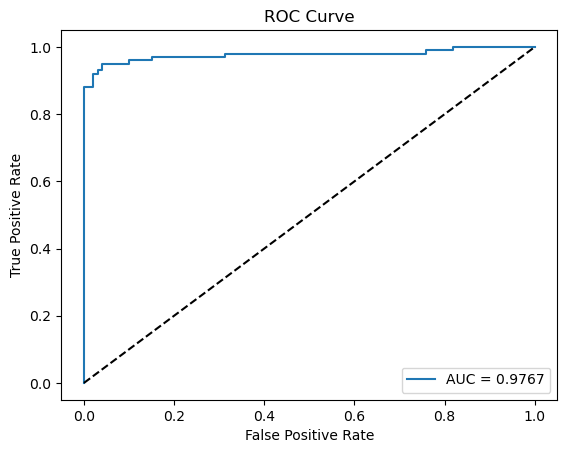

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Melihat dari skor AUC pada data train dan test yang tinggi, menunjukkan bahwa model yang telah dilakukan hyperparameter tuning ini siap digunakan untuk kebutuhan analisis dan otomasi klasifikasi seberapa banyak pengguna yang akan mengklik iklan.

In [76]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix


# Menghitung metrik kinerja
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Membuat classification report
class_report = classification_report(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan hasil
print("Model Performance metrics:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nModel Classification report:")
print("----------------------------")
print(class_report)
print("\nPrediction Confusion Matrix:")
print("----------------------------")
print(conf_matrix)

Model Performance metrics:
----------------------------
Accuracy: 0.9346733668341709
Precision: 0.9351233818770226
Recall: 0.9345959595959596
F1 Score: 0.9346469622331691

Model Classification report:
----------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        99
           1       0.92      0.95      0.94       100

    accuracy                           0.93       199
   macro avg       0.94      0.93      0.93       199
weighted avg       0.94      0.93      0.93       199


Prediction Confusion Matrix:
----------------------------
[[91  8]
 [ 5 95]]


Pada tahap ini, setelah dilakukan hyperparameter tuning menggunakan bayesian search melalui library hyperopt, kemudian dengan parameter terbaik hasil tuning akan digunakan kembali untuk melakukan model training sehingga hasilnya dapat terlihat sebagaimana yang ada pada classification report dan performance metrics, dimana nilai dari metrics2 yang ada stabil di angka 93%, kemudian metrics dari precision yang utamanya digunakan dalam model ML ini sebagai business metrics memiliki precision kategori 0 sebesar 95% dan kategori 1 sebesar 92% pada data testing.

## Confusion Matrix

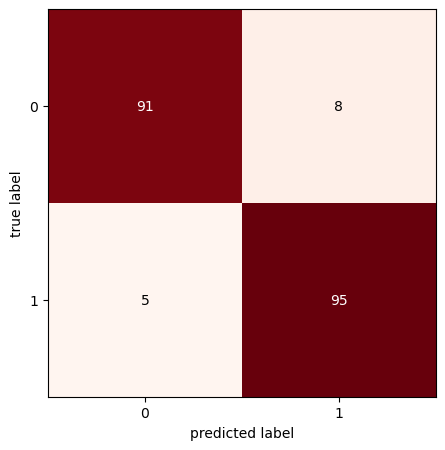

In [77]:
from mlxtend.plotting import plot_confusion_matrix

cmap = plt.cm.Reds

plot_confusion_matrix(confusion_matrix(y_test,y_pred),figsize=(5,8),cmap=cmap)
plt.show()

In [78]:
feature_names = X_rus.columns

In [655]:
#!pip install colorcet

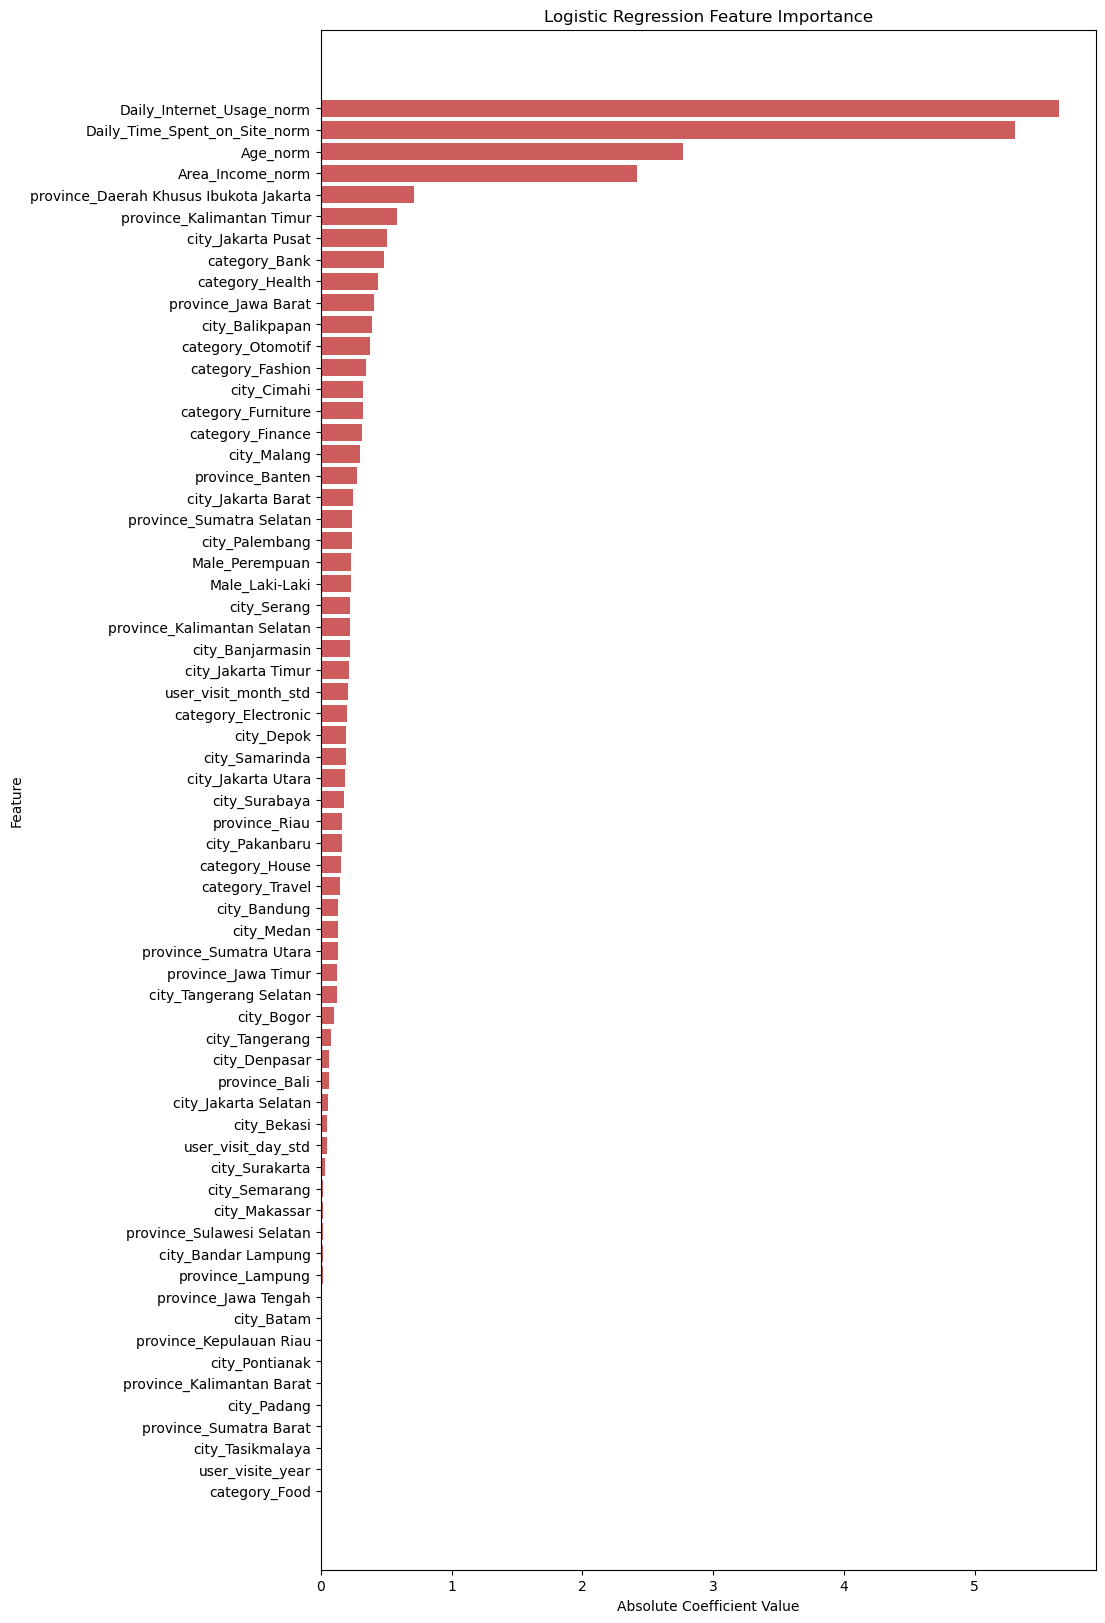

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc

# Get the absolute values of the coefficients
coef_abs = np.abs(lr.coef_[0])

# Sort the features based on the absolute coefficient values (ascending order)
sorted_idx = np.argsort(coef_abs)

# Get the feature names in the correct order
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Get the corresponding coefficient values
sorted_coef = coef_abs[sorted_idx]

#color_map = cc.glasbey_light
#bar_colors = ['pink' if c > 0 else 'red' for c in sorted_coef]
# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(range(len(sorted_feature_names)), sorted_coef, align='center', color='indianred')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

### Insight
- **`Daily Internet Usage`** <br>
Pengguna yang menghabiskan lebih banyak waktu di internet setiap hari mungkin lebih cenderung melihat iklan dan melakukan tindakan selanjutnya. Namun, ini juga bisa menjadi bumerang; jika pengguna merasa terganggu oleh iklan yang sering muncul saat mereka menjelajah internet, mereka mungkin kurang cenderung untuk mengklik iklan.
- **`Daily Time Spent on Site`** <br>
Pengguna yang menghabiskan waktu lebih lama mungkin sedang melakukan penjelajahan yang lebih mendalam atau terlibat dalam aktivitas yang lebih serius. Ini bisa menjadi indikator bahwa mereka lebih cenderung terlibat dengan iklan yang sesuai dengan minat mereka.
- **`Age`** <br>
Pengguna berbeda usia cenderung memiliki minat, preferensi, dan perilaku yang berbeda terhadap iklan. Misalnya, iklan yang ditargetkan pada remaja mungkin memiliki tampilan dan pesan yang berbeda dari iklan yang ditargetkan pada kelompok usia yang lebih tua.
- **`Area Income`** <br>
Pengguna dengan pendapatan yang lebih tinggi mungkin lebih cenderung untuk merespons iklan tertentu, terutama jika produk atau layanan yang diiklankan terkait dengan gaya hidup atau produk yang lebih eksklusif.
- **`Province Daerah Khusus Ibukota Jakarta`** <br>
Pengguna yang berdomisili di Ibukota Jakarta mungkin cendrung lebih cepat melihat iklan karena karakteristik demografis dan sosial yang berbeda dari daerah lain. Mengidentifikasi pengguna dari daerah tertentu dapat membantu dalam menyesuaikan iklan dan pesan yang sesuai dengan kebutuhan lokal atau preferensi.